# This script contains:
1. Import of Libraries and dataset
2. Plotting choropleth maps

## 1. Import of Libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [4]:
# Command to propt matplotlib visuals to appear in the notebook 
%matplotlib inline

In [5]:
# US JASON file import
country_geo= r'/Users/navneetjha/Desktop/A6/us-states.json'
# View JASON file
f = open(r'/Users/navneetjha/Desktop/A6/us-states.json')
# Return JASON file as a dictionary
data=json.load(f)
#Iterating through JASON list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [6]:
# Data import
df=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_wrangled',index_col=False)

In [7]:
# Checking data head
df.head()

,incident_id,date,state,city/county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,latitude,longitude,n_guns_involved,age,age_group,gender,status,type,state_house_district,state_senate_district
0,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
1,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
2,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,34.9791,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
3,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,3.0,0::Unknown,0::Unknown,...,35.0221,-85.2697,1.0,0::19,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,28.0,10.0
4,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,1.0,0::Unknown,0::Unknown,...,38.7067,-90.2494,1.0,0::28,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,76.0,4.0


In [8]:
# Checking data shape
df.shape

(45403, 21)

## 2. Plotting choropleth maps

In [10]:
# Creating dataframe for calculaing state-wise total gun injuries in the US
df_2=df.groupby('state').n_injured.sum()

In [11]:
df_2.head()

state
Alabama        615
Alaska          15
Arizona        311
Arkansas       505
California    1954
Name: n_injured, dtype: int64

In [12]:
# Checking null values
df_2.isnull().sum() # No null values

0

<Axes: xlabel='n_injured', ylabel='Count'>

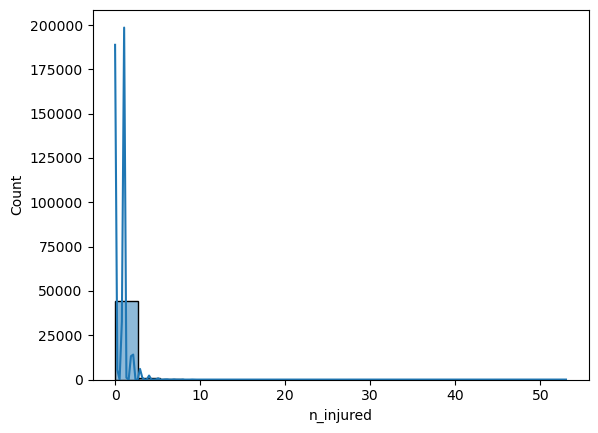

In [13]:
# Checking extreme values for 'n_injured' and 'n_killed'
sns.histplot(df['n_injured'], bins=20, kde = True)

<Axes: xlabel='n_killed', ylabel='Count'>

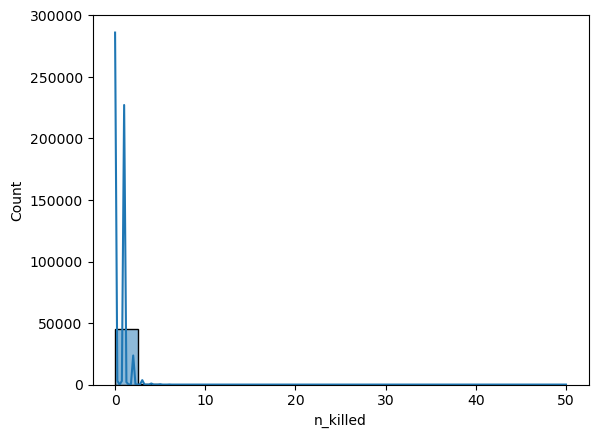

In [14]:
sns.histplot(df['n_killed'], bins=20, kde = True)

The histogram results does not show any extreme values in the dataframe

In [16]:
# Setting up a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)
# Creating choropleth of gun violence injuries in the US
folium.Choropleth(
    geo_data = country_geo, 
    data = df_2,
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Gun Violence Injuries in the US").add_to(map)
folium.LayerControl().add_to(map)

map

The maps results match with the previous analysis where we saw that Illinois has seen the highest number of injuries from gun violence, and is followed by Ohio, Florida and California.

In [18]:
# Creating dataframe for state-wise killing by gun violence
df_3=df.groupby('state').n_killed.sum().sort_values()

In [19]:
df_3.head()

state
Minnesota                2
District of Columbia     2
Montana                 10
Alaska                  11
New Hampshire           14
Name: n_killed, dtype: int64

In [20]:
# Setting up a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)
# Creating choropleth map of gun violence deaths in the US
folium.Choropleth(
    geo_data = country_geo, 
    data = df_3,
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Gun Violence Deaths in the US").add_to(map)
folium.LayerControl().add_to(map)

map

The maps results match with the previous analysis where we saw that California has seen the highest number of deaths from gun violence. The state is followed by Illinois and Florida.

The other research questions like: What is the growth rate of gun violence in the US from 2013-2018? • Who are the victims of this gun violence? and others need further analysis and could not be answered using the map. These questions will be explored in further exercises. 

In [23]:
# Visualization export
map.save('Gun Violence Injuries in the US_plot.html')
map.save('Gun Violence Deaths in the US_plot.html')